In [381]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [382]:
# Load the data
df = pd.read_csv('logs/experiments.csv', sep=";")

### Feature engineering and clean-up

In [383]:
# Outputs: ['id', 'experiment_name', 'start_time', 'end_time', 'seed', 'num_clients', 'num_rounds', 'num_local_epochs', 'data_distribution', 'class_distibution', 'loss', 'accuracy', 'class_wise_accuracy', 'class_distribution']
df.columns

Index(['id', 'experiment_name', 'start_time', 'end_time', 'seed',
       'num_clients', 'num_rounds', 'num_local_epochs', 'data_distribution',
       'class_distibution', 'loss', 'accuracy', 'class_wise_accuracy',
       'class_distribution'],
      dtype='object')

In [384]:
# fill non values in end_time with start_time
df['start_time'] = df['start_time'].fillna(0).astype(float)
df['end_time'] = df['end_time'].fillna(0).astype(float)

df['runtime'] = df['end_time'] - df['start_time']

# Set all 'start_time', 'end_time', 'runtime' that are 0 to NaN
df['start_time'] = df['start_time'].replace(0, np.nan)
df['end_time'] = df['end_time'].replace(0, np.nan)
df['runtime'] = df['runtime'].replace(0, np.nan)

# delete 'id' column
df = df.drop(columns=['id'])
df

,experiment_name,start_time,end_time,seed,num_clients,num_rounds,num_local_epochs,data_distribution,class_distibution,loss,accuracy,class_wise_accuracy,class_distribution,runtime
0,NaN,NaN,NaN,127491,2,5,10,NaN,NaN,"[117.38758146762848, 106.02106920257211, 99.93...","[0.8621, 0.877, 0.8813, 0.8868, 0.8902]",NaN,NaN,NaN
1,NaN,NaN,NaN,127491,2,10,10,NaN,NaN,"[117.63556433841586, 106.0819996073842, 99.948...","[0.8621, 0.8753, 0.8822, 0.8858, 0.8926, 0.889...",NaN,NaN,NaN
2,NaN,NaN,NaN,127491,5,5,10,NaN,NaN,"[145.5251770347357, 124.48606580048799, 117.51...","[0.8311999999999999, 0.85856, 0.8641, 0.869640...",NaN,NaN,NaN
3,NaN,NaN,NaN,127491,5,10,10,NaN,NaN,"[145.7048797905445, 124.54303043484688, 117.48...","[0.8309799999999999, 0.8584999999999999, 0.864...",NaN,NaN,NaN
4,NaN,NaN,NaN,127491,10,5,10,NaN,NaN,"[169.5884241208434, 142.65819605737926, 132.28...","[0.8014800000000001, 0.8356399999999999, 0.845...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,experiment_12,1.707144e+09,1.707144e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.0, '3': 0.0, '4':...","[713.8058392047882, 385.4734344124794, 274.069...","[0.24901999999999996, 0.5390999999999999, 0.67...","[{'9': 0.16633333333333333, '1': 0.02883333333...","[['{""9"": 6000, ""0"": 6000, ""3"": 6000, ""2"": 6000...",161.718205
126,experiment_12,1.707144e+09,1.707144e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.0, '3': 0.0, '4':...","[715.5872688293457, 386.70471301078794, 274.69...","[0.24762, 0.53684, 0.67814, 0.69176, 0.7266, 0...","[{'9': 0.16633333333333333, '1': 0.02823333333...","[['{""9"": 6000, ""0"": 6000, ""3"": 6000, ""2"": 6000...",161.679657
127,experiment_12,1.707144e+09,1.707144e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.0, '3': 0.0, '4':...","[716.1753739833832, 383.2809588670731, 274.423...","[0.24862, 0.54186, 0.67838, 0.69336, 0.72702, ...","[{'9': 0.16633333333333333, '1': 0.03053333333...","[['{""9"": 6000, ""0"": 6000, ""3"": 6000, ""2"": 6000...",161.119317
128,experiment_12,1.707144e+09,1.707144e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.0, '3': 0.0, '4':...","[715.866776227951, 385.86431167125704, 275.036...","[0.24853999999999998, 0.53788, 0.67714, 0.6922...","[{'9': 0.16633333333333333, '1': 0.02966666666...","[['{""9"": 6000, ""0"": 6000, ""3"": 6000, ""2"": 6000...",161.381614


In [385]:
# Select all where 'data_distribution' is not nan
df_with_data_dist = df[df['data_distribution'].notna()].copy().reset_index(drop=True)
client_dist = { '0': 6000, '1': 6000, '2': 6000, '3': 6000, '4': 6000, '5': 6000, '6': 6000, '7': 6000, '8': 6000, '9': 6000 }
standard_class_dist = df_with_data_dist.iloc[4]['class_distribution']
df['class_distribution'] = df['class_distribution'].fillna(standard_class_dist)
df['class_distribution'] = df['class_distribution'].str.replace('\'', '').apply(lambda x: json.loads(x)[0])

In [386]:
time_in_min = df[df['runtime'].notna()]['runtime'].mean() / 60
print(f"Average time per experiment: {time_in_min:.2f} min")

Average time per experiment: 3.49 min


In [387]:
df_with_class_wise_acc = df[df['class_wise_accuracy'].notna()].copy().reset_index(drop=True)
df_with_class_wise_acc['class_wise_accuracy'] = df_with_class_wise_acc['class_wise_accuracy'].str.replace('\'', '"').apply(lambda x: json.loads(x)[-1])
df_with_class_wise_acc = df_with_class_wise_acc.sort_values(by='start_time', ascending=True)
df_with_class_wise_acc['loss'] = df_with_class_wise_acc['loss'].apply(lambda x: json.loads(x))
df_with_class_wise_acc['max_loss'] = df_with_class_wise_acc['loss'].apply(lambda x: max(x))
df_with_class_wise_acc['accuracy'] = df_with_class_wise_acc['accuracy'].apply(lambda x: json.loads(x))
df_with_class_wise_acc['max_accuracy'] = df_with_class_wise_acc['accuracy'].apply(lambda x: max(x))
df_with_class_wise_acc

,experiment_name,start_time,end_time,seed,num_clients,num_rounds,num_local_epochs,data_distribution,class_distibution,loss,accuracy,class_wise_accuracy,class_distribution,runtime,max_loss,max_accuracy
0,experiment_10,1.707100e+09,1.707100e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[None, {'0': 0.1, '1': 0.9, '2': 0.1, '3': 0.1...","[176.6014671176672, 148.41740896105767, 137.18...","[0.79306, 0.8272, 0.8432599999999999, 0.852540...","{'9': 0.15663333333333335, '2': 0.137, '1': 0....","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",296.821303,176.601467,0.87502
1,experiment_10,1.707100e+09,1.707101e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.6272398352623, 161.83304738402367, 145.31...","[0.76648, 0.8103, 0.82904, 0.8368800000000001,...","{'9': 0.15660000000000002, '2': 0.129233333333...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.892785,199.627240,0.86358
2,experiment_10,1.707101e+09,1.707101e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.94966690540315, 161.6666348427534, 145.27...","[0.7658600000000001, 0.8107599999999999, 0.829...","{'9': 0.15650000000000003, '2': 0.128800000000...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",242.392982,199.949667,0.86348
3,experiment_10,1.707101e+09,1.707101e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[200.04065457582473, 161.83783915936948, 145.2...","[0.76624, 0.8102, 0.82942, 0.83636, 0.85044000...","{'9': 0.15650000000000003, '2': 0.129066666666...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",239.758537,200.040655,0.86338
4,experiment_4,1.707140e+09,1.707140e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[None, None, None, None, None]","[168.407130792737, 149.15500521957875, 133.797...","[0.806, 0.825, 0.8471, 0.8562, 0.8583999999999...","{'9': 0.1565, '2': 0.13833333333333334, '1': 0...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",310.102199,168.407131,0.87490
5,experiment_4,1.707141e+09,1.707141e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[None, None, None, None, None]","[168.36339322328567, 149.22875865399837, 133.8...","[0.8072000000000001, 0.8248999999999999, 0.847...","{'9': 0.15633333333333332, '2': 0.139166666666...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",310.540967,168.363393,0.87580
6,experiment_4,1.707141e+09,1.707142e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[None, None, None, None, None]","[168.45116451084613, 148.99810514450073, 133.7...","[0.8058, 0.8253999999999999, 0.847899999999999...","{'9': 0.15616666666666668, '2': 0.138, '1': 0....","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",310.317750,168.451165,0.87540
7,experiment_4,1.707142e+09,1.707142e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[None, None, None, None, None]","[168.30725466907023, 149.17547348439695, 133.8...","[0.8063, 0.8261, 0.8473, 0.8577999999999999, 0...","{'9': 0.15683333333333332, '2': 0.137333333333...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",310.577233,168.307255,0.87540
8,experiment_10,1.707142e+09,1.707142e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.79231022000312, 161.78895066976548, 145.2...","[0.76618, 0.8103399999999998, 0.82932000000000...","{'9': 0.15650000000000003, '2': 0.128900000000...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.121032,199.792310,0.86322
9,experiment_10,1.707142e+09,1.707143e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.99259662032128, 161.83596569001674, 145.2...","[0.76524, 0.8100400000000001, 0.82948, 0.83672...","{'9': 0.1565666666666667, '2': 0.1292333333333...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.317508,199.992597,0.86266


In [388]:
df_with_class_wise_acc[['experiment_name', 'max_accuracy']]

,experiment_name,max_accuracy
0,experiment_10,0.87502
1,experiment_10,0.86358
2,experiment_10,0.86348
3,experiment_10,0.86338
4,experiment_4,0.87490
5,experiment_4,0.87580
6,experiment_4,0.87540
7,experiment_4,0.87540
8,experiment_10,0.86322
9,experiment_10,0.86266


In [389]:
df_with_class_wise_acc[df_with_class_wise_acc['experiment_name'] == 'experiment_10'].iloc[4:]

,experiment_name,start_time,end_time,seed,num_clients,num_rounds,num_local_epochs,data_distribution,class_distibution,loss,accuracy,class_wise_accuracy,class_distribution,runtime,max_loss,max_accuracy
8,experiment_10,1.707142e+09,1.707142e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.79231022000312, 161.78895066976548, 145.2...","[0.76618, 0.8103399999999998, 0.82932000000000...","{'9': 0.15650000000000003, '2': 0.128900000000...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.121032,199.792310,0.86322
9,experiment_10,1.707142e+09,1.707143e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.99259662032128, 161.83596569001674, 145.2...","[0.76524, 0.8100400000000001, 0.82948, 0.83672...","{'9': 0.1565666666666667, '2': 0.1292333333333...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.317508,199.992597,0.86266
10,experiment_10,1.707143e+09,1.707143e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.8352483391762, 161.81595180630683, 145.32...","[0.76606, 0.8103999999999999, 0.82926, 0.83634...","{'9': 0.15650000000000003, '2': 0.129266666666...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",240.392806,199.835248,0.86366
11,experiment_10,1.707143e+09,1.707143e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.8934064090252, 161.6569968044758, 145.261...","[0.76574, 0.8104800000000001, 0.82905999999999...","{'9': 0.15666666666666668, '2': 0.129066666666...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.702836,199.893406,0.86364
12,experiment_10,1.707143e+09,1.707143e+09,127491,5,10,5,"[0.2, 0.2, 0.2, 0.2, 0.2]","[{'0': 0.1, '1': 0.1, '2': 0.1, '3': 0.1, '4':...","[199.6677025258541, 161.71762390136718, 145.29...","[0.7660199999999999, 0.8102199999999999, 0.829...","{'9': 0.15660000000000002, '2': 0.129233333333...","[{'9': 6000, '0': 6000, '3': 6000, '2': 6000, ...",241.186815,199.667703,0.86314


In [390]:
## get view of df
#experiment_10_samples = df_with_class_wise_acc[df_with_class_wise_acc['experiment_name'] == 'experiment_10'].iloc[4:]
#
#for i, (id, row) in enumerate(experiment_10_samples.iterrows()):
#    #print(f"{row['experiment_name']} - class_wise_accuracy: {row['class_wise_accuracy']{}}")
#    class_distibution = json.loads(row['class_distibution'].replace('\'', '"').replace('None', 'null'))
#    class_distibution = pd.DataFrame(class_distibution)
#    
#    # Math to calculate new class_wise_accuracy
#    #acc = v / class_wise_total[k]
#    #acc * class_wise_total[k] = v
#
#    num_clients = row['num_clients']
#    class_accuracy_list = []
#    for j in range(10):
#        class_accuracy = row['class_wise_accuracy'].get(str(j), 0)
#        dist = class_distibution[str(j)] 
#        theo_total = (dist * 6000) 
#        real_mean_v = (class_accuracy*num_clients * theo_total)
#        new_accuracy = (real_mean_v / theo_total).mean() * 1.2
#        class_accuracy_list.append(new_accuracy)
#
#    # Write new class_wise_accuracy to original dataframe
#    new_class_wise_accuracy = dict(zip(range(10), class_accuracy_list))
#    df_with_class_wise_acc.at[id, 'class_wise_accuracy'] = new_class_wise_accuracy

experiment_10 - accuracy: 0.8750199999999999, class_wise_accuracy: {'9': 0.15663333333333335, '2': 0.137, '1': 0.16256666666666666, '6': 0.1, '4': 0.13199999999999998, '5': 0.15966666666666668, '7': 0.16006666666666666, '3': 0.14963333333333334, '8': 0.1626, '0': 0.13820000000000002}
experiment_10 - accuracy: 0.86358, class_wise_accuracy: {'9': 0.15660000000000002, '2': 0.1292333333333333, '1': 0.16216666666666665, '6': 0.09453333333333333, '4': 0.14133333333333334, '5': 0.15616666666666668, '7': 0.16010000000000002, '3': 0.14233333333333334, '8': 0.16283333333333333, '0': 0.134}
experiment_10 - accuracy: 0.86348, class_wise_accuracy: {'9': 0.15650000000000003, '2': 0.12880000000000003, '1': 0.16216666666666665, '6': 0.0945, '4': 0.14150000000000001, '5': 0.15626666666666666, '7': 0.16010000000000002, '3': 0.1425, '8': 0.16283333333333333, '0': 0.13396666666666665}
experiment_10 - accuracy: 0.86338, class_wise_accuracy: {'9': 0.15650000000000003, '2': 0.12906666666666666, '1': 0.162233

<Figure size 640x480 with 0 Axes>

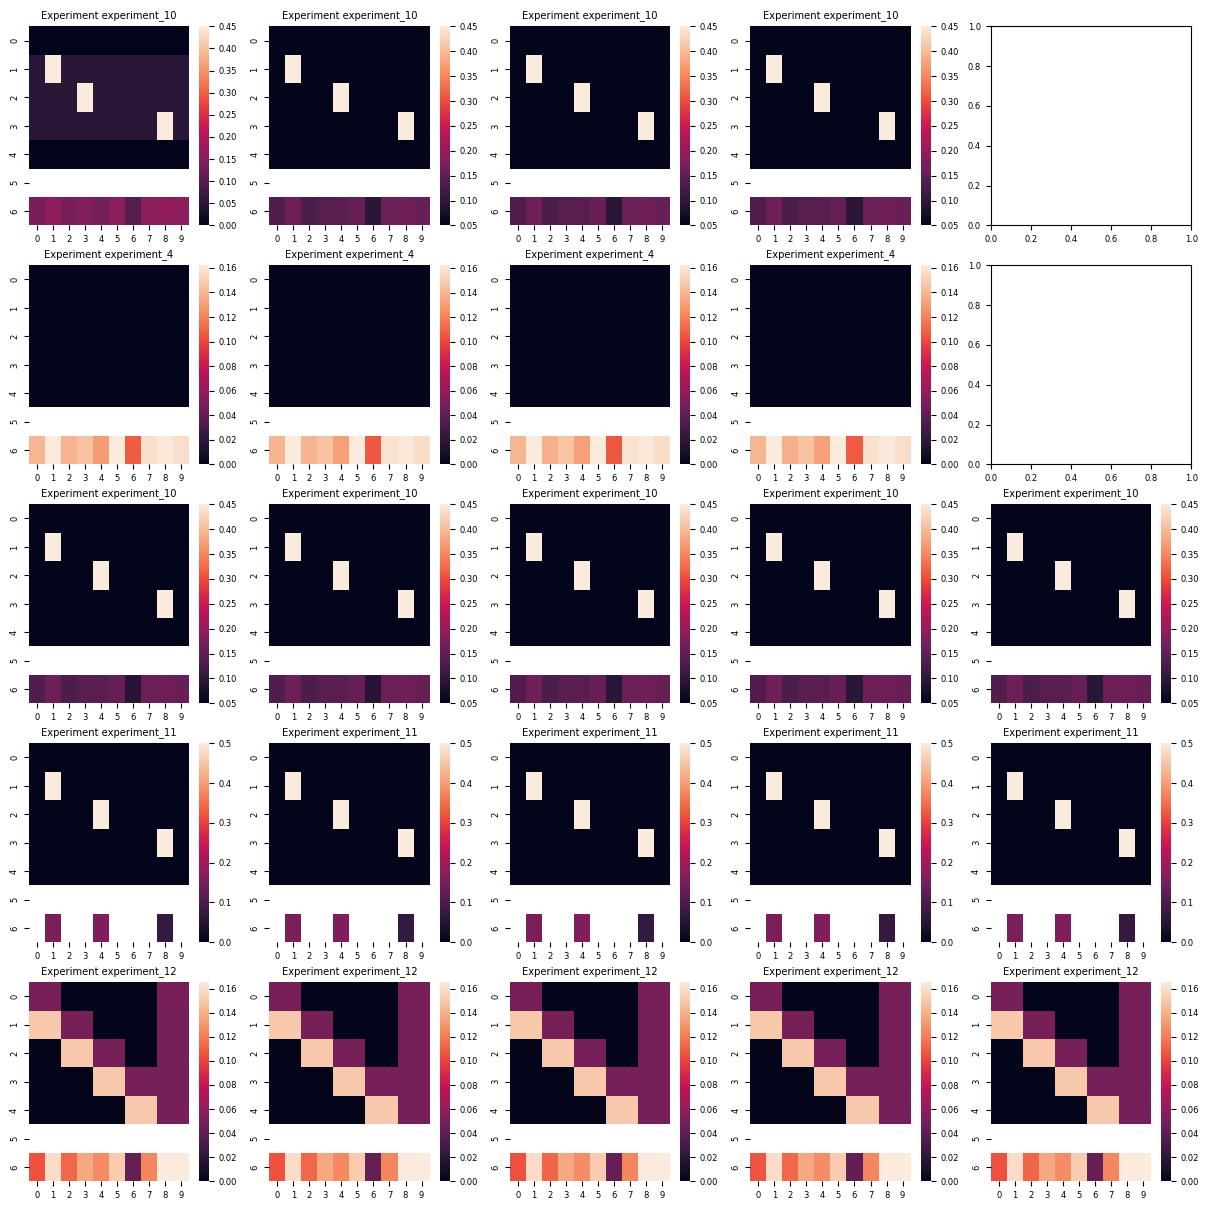

In [392]:
for i, row in df_with_class_wise_acc.iterrows():
    print(f"{row['experiment_name']} - accuracy: {row['max_accuracy']}, class_wise_accuracy: {row['class_wise_accuracy']}")


# make font size smaller
plt.rcParams.update({'font.size': 6})
# add space between subplots
plt.subplots_adjust(wspace=2, hspace=2)
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, axis in enumerate(axes.flatten()):
    if i in [4, 9]: continue
    if i > 4: i -= 1
    if i > 9: i -= 1

    row = df_with_class_wise_acc.iloc[i]
    class_distibution = json.loads(row['class_distibution'].replace('\'', '"').replace('None', '{}'))
    dist = [ { str(i): dist.get(str(i), 0) for i in range(10) } for dist in class_distibution]

    rows = [*dist]
    rows.append({str(it): None for it in range(10)})
    rows.append(row['class_wise_accuracy'])

    client_dist = pd.DataFrame(data=rows, columns=list(row['class_distribution'][0].keys()))[[str(it) for it in range(10)]]
    client_dist.iloc[:row['num_clients'], :] *= 0.5
    sns.heatmap(client_dist, ax=axis)
    axis.set_title(f"Experiment {row['experiment_name']}")
